Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Solving linear variational problem.


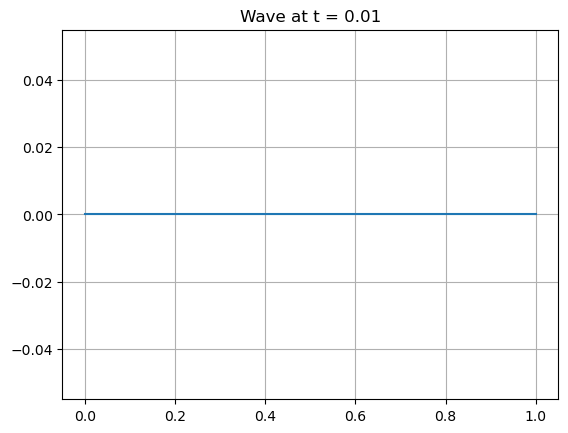

Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational p

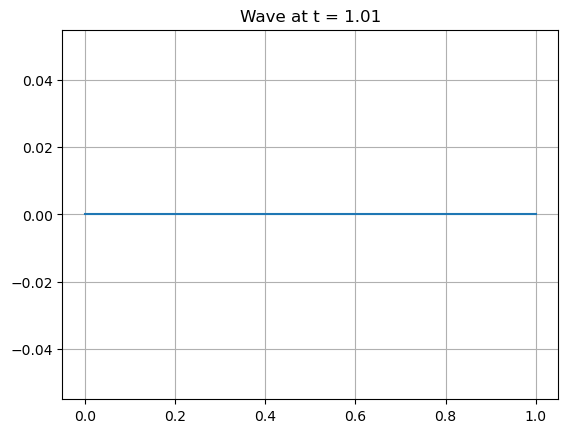

Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational p

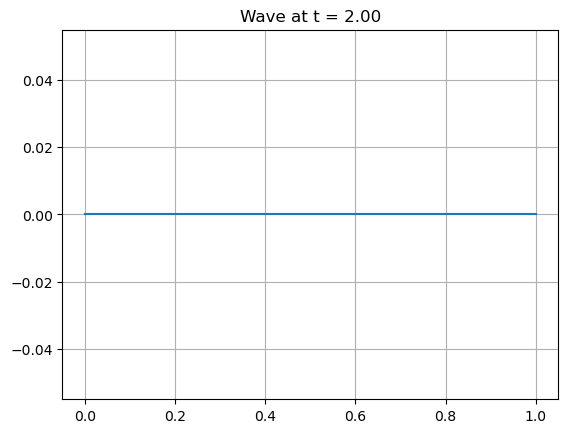

In [1]:
from fenics import *
import matplotlib.pyplot as plt

# Spatial mesh and function space
nx = 50
mesh = UnitIntervalMesh(nx)
V = FunctionSpace(mesh, 'P', 1)

# Time-stepping parameters
T = 2.0
dt = 0.01
num_steps = int(T / dt)

# Boundary condition u = 0
bc = DirichletBC(V, Constant(0.0), 'on_boundary')

# Initial conditions: u = 0, du/dt = 0
u_n = interpolate(Constant(0.0), V)  # u at t - dt
u_ = interpolate(Constant(0.0), V)   # u at t
u_new = Function(V)                  # u at t + dt

# Variational form
u_trial = TrialFunction(V)
v = TestFunction(V)
a = u_trial * v * dx + dt**2 * dot(grad(u_trial), grad(v)) * dx
L = 2 * u_ * v * dx - u_n * v * dx  # RHS for central difference

# Time loop
for n in range(num_steps):
    solve(a == L, u_new, bc)

    # Plot every 100 steps
    if n % 100 == 0 or n == num_steps - 1:
        plot(u_new)
        plt.title(f"Wave at t = {dt * (n+1):.2f}")
        plt.grid(True)
        plt.show()

    # Update for next step
    u_n.assign(u_)
    u_.assign(u_new)
